In [1]:
# This is a comment.
# In this first cell, we import the modules/libraries

%matplotlib inline

#from ncam_waveforms import *
import sys
from ctapipe import utils
import matplotlib as mpl
from matplotlib import pyplot as plt
from pkg_resources import resource_filename
import os
import statistics
from matplotlib.patches import Rectangle
import random as rd

import scipy 
import numpy as np
from astropy.table import Table
from astropy import units as u
import math as mt
from datetime import datetime

from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry

from ctapipe_io_nectarcam import NectarCAMEventSource
from ctapipe.io import EventSource, EventSeeker

plt.rcParams['figure.figsize'] = [13, 9]

In [2]:
#Set the number of events to read
max_events = 10000

#Set the run number
run_number = str(2159)

#Define the filename
#filename='/Users/fbrun/ork/CTA/NectarCAM/Data/RandomTimes/NectarCAM.Run'+run_number+'.000[0-9].fits.fz'
filename='/local/home/ch266912/NectarCAM_Data/NectarCAM.Run'+run_number+'.000[0-9].fits.fz'    

In [3]:
reader= NectarCAMEventSource(input_url=filename, max_events=max_events)

In [4]:
nb_pixels=reader.camera_config.num_pixels
pixel_ids=reader.camera_config.expected_pixels_id
#print (nb_pixels, pixel_ids)
allpixelslist= pixel_ids.tolist()
print (allpixelslist)

[539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913,

In [5]:
mypixels=pixel_ids[203:224]
#print (mypixels)
print (mypixels)
ids= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
pixelslist= mypixels.tolist()

[917 918 919 920 921 922 923 931 932 933 934 935 936 937 938 939 940 941
 942 943 944]


In [6]:
wvfs=[]
timestamps=[]
nb_ped=0

for p,event in enumerate (reader):
    if event.trigger.event_type == 32:
        wvfs.append(event.r0.tel[0].waveform[0, pixel_ids[:]])
        timestamps.append(1e-9*event.nectarcam.tel[0].evt.ucts_timestamp)
        nb_ped+=1
 
print (nb_ped)

10000


In [7]:
wvfs= np.array(wvfs)
wvfs.shape

(10000, 364, 60)

In [8]:
mean=wvfs[0,ids[:]].mean(axis=1)
print (mean)

[246.33333333 246.13333333 244.76666667 245.11666667 246.83333333
 246.06666667 249.06666667 246.03333333 243.56666667 245.73333333
 245.7        248.98333333 249.01666667 253.05       242.43333333
 243.41666667 243.16666667 245.03333333 243.66666667 245.66666667
 243.18333333]


In [9]:
print ((wvfs [:,0]))

[[256. 251. 252. ... 251. 250. 247.]
 [247. 247. 246. ... 245. 251. 245.]
 [248. 243. 245. ... 245. 248. 247.]
 ...
 [246. 244. 249. ... 246. 246. 247.]
 [244. 247. 243. ... 245. 248. 248.]
 [247. 248. 248. ... 246. 242. 245.]]


In [10]:
print (statistics.mean (wvfs[0,173]))

239.9


In [11]:
# For each pixel, the mean of every event over 60 samples
allmeans=[]
for j in range (len(pixel_ids)):
    means=[]
    for i in range (nb_ped):
        mean= statistics.mean (wvfs[i,j])
        means.append (mean)
    allmeans.append(means)

In [12]:
print (allmeans[0])

[246.33333333333334, 246.76666666666668, 247.31666666666666, 248.51666666666668, 246.33333333333334, 247.36666666666667, 246.61666666666667, 246.28333333333333, 248.53333333333333, 246.61666666666667, 247.13333333333333, 247.88333333333333, 247.68333333333334, 246.61666666666667, 246.08333333333334, 246.55, 247.5, 246.43333333333334, 247.28333333333333, 246.43333333333334, 247.65, 246.11666666666667, 246.91666666666666, 248.31666666666666, 247.85, 246.88333333333333, 247.03333333333333, 246.46666666666667, 247.08333333333334, 247.28333333333333, 246.95, 246.75, 247.6, 247.18333333333334, 247.91666666666666, 246.53333333333333, 247.26666666666668, 247.78333333333333, 247.15, 247.53333333333333, 247.5, 247.3, 247.06666666666666, 246.73333333333332, 247.51666666666668, 246.25, 247.03333333333333, 248.18333333333334, 247.4, 247.56666666666666, 246.95, 246.88333333333333, 246.48333333333332, 247.61666666666667, 246.6, 246.91666666666666, 246.83333333333334, 247.2, 246.71666666666667, 247.4,

In [13]:
# Determine for each pixel, which events have severe negative peaks

negevents=[]
for k in range (len(pixel_ids)):
    events=[]
    for i in range (nb_ped):
        negative_peaks=0
        for j in range (60):
            if ((allmeans[k][i])-wvfs[i,k,j])>7:
                negative_peaks+=1
        if negative_peaks >3:
            events.append (i)  
            
    negevents.append (events)

#print (negevents)

In [14]:
totalnegevents=[]
for i in range (len (negevents)):
    for j in range (len (negevents[i])):
        if negevents[i][j] in totalnegevents:
            continue
        else:
            totalnegevents.append(negevents[i][j])
totalnegevents=sorted (totalnegevents)
print (totalnegevents)

[0, 3, 4, 7, 8, 9, 11, 13, 16, 18, 22, 25, 27, 30, 32, 35, 37, 41, 42, 44, 46, 49, 51, 56, 62, 67, 69, 72, 75, 76, 78, 79, 86, 92, 94, 96, 98, 99, 106, 107, 109, 111, 114, 119, 122, 123, 125, 135, 137, 140, 142, 151, 153, 156, 160, 163, 169, 170, 172, 174, 176, 177, 180, 187, 193, 194, 195, 196, 198, 199, 205, 210, 213, 218, 219, 222, 223, 225, 228, 235, 247, 249, 254, 255, 259, 260, 265, 269, 273, 275, 278, 280, 282, 284, 287, 290, 294, 296, 297, 306, 308, 309, 310, 312, 316, 319, 324, 328, 330, 333, 334, 337, 340, 343, 345, 350, 357, 366, 370, 374, 378, 384, 385, 391, 395, 398, 400, 402, 408, 409, 414, 415, 418, 420, 425, 427, 429, 431, 432, 439, 442, 443, 448, 451, 453, 454, 455, 456, 457, 461, 462, 463, 470, 471, 473, 476, 477, 478, 482, 484, 487, 491, 493, 496, 497, 500, 503, 504, 507, 509, 515, 516, 519, 525, 528, 530, 532, 533, 534, 541, 548, 549, 552, 558, 560, 563, 565, 566, 567, 570, 573, 574, 577, 588, 591, 592, 593, 597, 600, 601, 602, 609, 611, 613, 616, 621, 627, 633, 639

In [15]:
for i in range (len(pixel_ids)):
    print ('Pixel ', i, ' has ',(len (negevents[i])*100/(nb_ped)), '% weird events')
    len (negevents [10])

Pixel  0  has  0.46 % weird events
Pixel  1  has  0.03 % weird events
Pixel  2  has  0.01 % weird events
Pixel  3  has  0.82 % weird events
Pixel  4  has  0.02 % weird events
Pixel  5  has  0.47 % weird events
Pixel  6  has  0.13 % weird events
Pixel  7  has  0.01 % weird events
Pixel  8  has  0.22 % weird events
Pixel  9  has  0.03 % weird events
Pixel  10  has  0.2 % weird events
Pixel  11  has  0.24 % weird events
Pixel  12  has  0.19 % weird events
Pixel  13  has  0.02 % weird events
Pixel  14  has  0.09 % weird events
Pixel  15  has  0.01 % weird events
Pixel  16  has  0.06 % weird events
Pixel  17  has  0.0 % weird events
Pixel  18  has  0.0 % weird events
Pixel  19  has  0.07 % weird events
Pixel  20  has  0.0 % weird events
Pixel  21  has  0.03 % weird events
Pixel  22  has  0.09 % weird events
Pixel  23  has  0.1 % weird events
Pixel  24  has  0.01 % weird events
Pixel  25  has  0.03 % weird events
Pixel  26  has  0.04 % weird events
Pixel  27  has  0.01 % weird events
Pixel  

Pixel  345  has  0.06 % weird events
Pixel  346  has  0.0 % weird events
Pixel  347  has  0.01 % weird events
Pixel  348  has  0.03 % weird events
Pixel  349  has  0.0 % weird events
Pixel  350  has  0.0 % weird events
Pixel  351  has  0.02 % weird events
Pixel  352  has  0.02 % weird events
Pixel  353  has  0.02 % weird events
Pixel  354  has  0.02 % weird events
Pixel  355  has  0.01 % weird events
Pixel  356  has  0.0 % weird events
Pixel  357  has  0.0 % weird events
Pixel  358  has  0.0 % weird events
Pixel  359  has  0.01 % weird events
Pixel  360  has  0.07 % weird events
Pixel  361  has  0.01 % weird events
Pixel  362  has  0.16 % weird events
Pixel  363  has  0.01 % weird events


In [16]:
# Max number of noisy events
max=0
for i in range (len (negevents)):
    if len (negevents[i])> max:
        max = len (negevents[i])
print (max)
        

548


In [17]:
occurences=[]
for j in range (nb_ped):
    count=0
    for i in range (len (negevents)):
        if len(negevents[i])==0:
            continue
        else:
            if j in negevents[i]:
                count+=1
    occurences.append (count)

In [18]:
print (np.max(occurences))

6


In [189]:
proportions=[]
for i in range (1855):
    if i in allpixelslist:
        props= (len(negevents[allpixelslist.index(i)]))
    else:
        props=0
    proportions.append (props)
    
most_noisyID=proportions.index(np.max(proportions))
arrangedprops= sorted (proportions, reverse=True)
proportionsunchanged=proportions

proportions= [proportions]
proportions= np.array (proportions)
proportions.shape

(1, 1855)

In [190]:
print (len(proportions))

1


In [191]:
repeated=[]
for i in range (len(proportions[0])):
    if proportions[0][i]==9:
        repeated.append(i)
print (repeated)

[553, 561, 659, 707, 810, 827, 898, 941, 1178]


In [192]:
proportions=[]
for i in range (1855):
    if i in repeated:
        props= (len(negevents[allpixelslist.index(i)]))
    else:
        props=0
    proportions.append (props)
    
most_noisyID=proportions.index(np.max(proportions))
arrangedprops= sorted (proportions, reverse=True)
proportionsunchanged=proportions

proportions= [proportions]
proportions= np.array (proportions)
proportions.shape

(1, 1855)

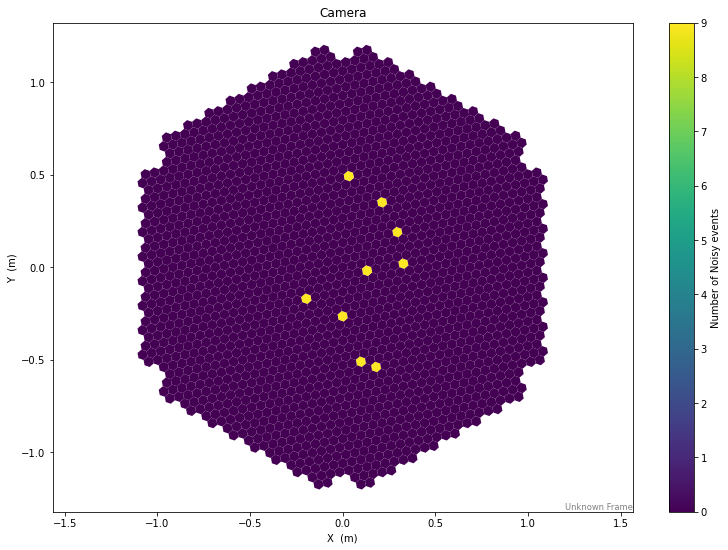

In [193]:
plt.rcParams['figure.figsize'] = [13,9]
geom = CameraGeometry.from_name("NectarCam-003")
geom.rotate(90*u.deg)

disp = CameraDisplay(geom,title="Camera")
disp.image= proportions.mean(axis=0)

#disp.image = wvfs[0,0,:].mean(axis=1)
disp.add_colorbar(label='Number of Noisy events')
#disp.set_limits_minmax(240,255)

In [150]:
proportions=[]
for i in range (1855):
    if i in mypixels:
        props= (len(negevents[allpixelslist.index(i)]))
    else:
        props=0
    proportions.append (props)
    
most_noisyID=proportions.index(np.max(proportions))
arrangedprops= sorted (proportions, reverse=True)
proportionsunchanged=proportions

proportions= [proportions]
proportions= np.array (proportions)
proportions.shape

(1, 1855)

In [78]:
print (arrangedprops)

[548, 530, 468, 282, 242, 179, 101, 82, 67, 66, 60, 58, 58, 53, 47, 46, 45, 44, 39, 39, 37, 36, 31, 28, 26, 24, 24, 22, 21, 21, 21, 20, 20, 20, 19, 19, 16, 16, 15, 15, 14, 14, 14, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [88]:
proportions=[]
for i in range (1855):
    if i in magical:
        props= (len(negevents[allpixelslist.index(i)]))
    else:
        props=0
    proportions.append (props)
    
most_noisyID=proportions.index(np.max(proportions))
arrangedprops= sorted (proportions, reverse=True)
proportionsunchanged=proportions

proportions= [proportions]
proportions= np.array (proportions)
proportions.shape

ValueError: 57 is not in list

In [21]:
secondpixel=proportionsunchanged.index(arrangedprops[0])
print (secondpixel)

917


In [22]:
print (most_noisyID)

917


In [23]:
# MODIFIED
#most_noisyID=917

In [24]:
most_noisy= allpixelslist.index(most_noisyID)
print (most_noisy)

203


In [25]:
print (negevents[213])
events162 = negevents[213]

[2028]


In [25]:
print (negevents[162])

[40, 244, 247, 273, 466, 540, 568, 674, 814, 868, 1044, 1047, 1064, 1087, 1109, 1183, 1219, 1224, 1325, 1367, 1406, 1418, 1455, 1633, 1655, 1752, 1777, 1795, 1819, 1991, 2008, 2073, 2197, 2308, 2412, 2554, 2563, 2583, 2918, 3203, 3292, 3326, 3382, 3426, 3533, 3699, 3787, 3803, 3817, 3844, 3927, 3950, 3984, 4070, 4074, 4226, 4333, 4341, 4379, 4437, 4438, 4531, 4570, 4578, 4813, 4896, 4928, 4980, 4995, 5033, 5164, 5251, 5430, 5455, 5464, 5500, 5762, 5795, 5812, 5878, 5953, 5998, 6045, 6046, 6064, 6068, 6154, 6222, 6394, 6407, 6414, 6493, 6577, 6681, 6925, 7007, 7028, 7056, 7062, 7225, 7489, 7605, 7635, 7691, 7786, 7859, 7862, 7901, 7998, 8081, 8163, 8198, 8318, 8326, 8382, 8482, 8498, 8684, 8720, 8757, 8759, 8778, 8820, 8822, 8970, 9021, 9186, 9213, 9275, 9276, 9355, 9470, 9586, 9623, 9751, 9754, 9936, 9943, 9978]


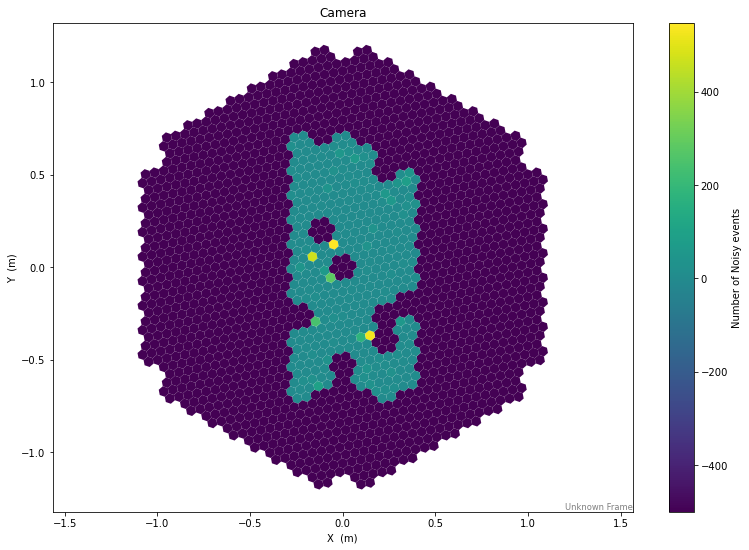

In [26]:
plt.rcParams['figure.figsize'] = [13,9]
geom = CameraGeometry.from_name("NectarCam-003")
geom.rotate(90*u.deg)

disp = CameraDisplay(geom,title="Camera")
disp.image= proportions.mean(axis=0)

#disp.image = wvfs[0,0,:].mean(axis=1)
disp.add_colorbar(label='Number of Noisy events')
#disp.set_limits_minmax(240,255)

Text(0, 0.5, 'ADC')

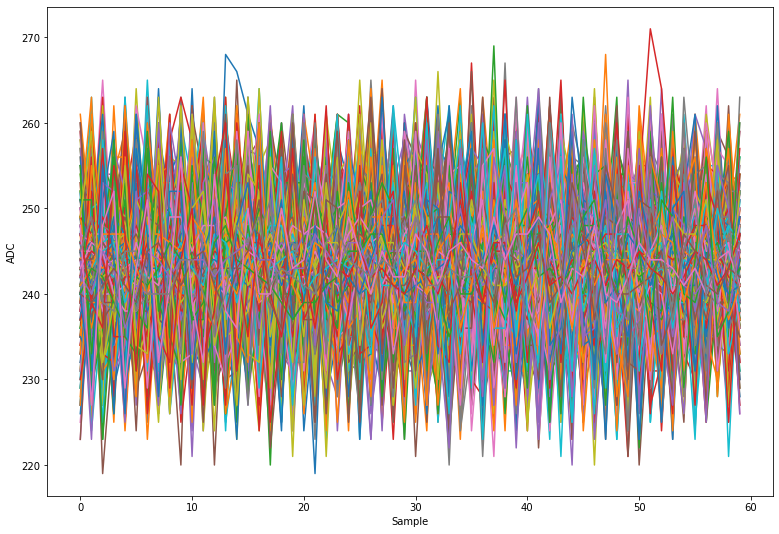

In [158]:
plt.rcParams['figure.figsize'] = [13,9]
for i in negevents[most_noisy]:
    plt.plot (wvfs[i,most_noisy].T)
plt.xlabel('Sample')
plt.ylabel('ADC')

In [27]:
differences=[]
for i in range (nb_ped):
    difference=0
    for j in range (60):
        jj=j
        if j==59:
            continue
        elif abs (wvfs[i,most_noisy,j]-wvfs[i,most_noisy,j+1])>difference:
            difference =abs (wvfs[i,most_noisy,j]-wvfs[i,most_noisy,j+1])
            peak=jj
    differences.append ([i,difference,peak])

In [28]:
print (differences)

[[0, 64.0, 0], [1, 8.0, 23], [2, 15.0, 57], [3, 7.0, 14], [4, 8.0, 58], [5, 7.0, 35], [6, 7.0, 9], [7, 11.0, 45], [8, 8.0, 21], [9, 8.0, 3], [10, 9.0, 27], [11, 8.0, 9], [12, 7.0, 9], [13, 9.0, 5], [14, 10.0, 11], [15, 11.0, 9], [16, 9.0, 25], [17, 7.0, 0], [18, 8.0, 39], [19, 13.0, 34], [20, 12.0, 51], [21, 11.0, 18], [22, 7.0, 42], [23, 10.0, 7], [24, 9.0, 4], [25, 8.0, 16], [26, 9.0, 7], [27, 10.0, 11], [28, 10.0, 9], [29, 11.0, 29], [30, 9.0, 10], [31, 8.0, 25], [32, 10.0, 18], [33, 9.0, 56], [34, 10.0, 2], [35, 12.0, 19], [36, 10.0, 19], [37, 6.0, 12], [38, 8.0, 6], [39, 8.0, 15], [40, 11.0, 34], [41, 9.0, 1], [42, 8.0, 2], [43, 9.0, 42], [44, 7.0, 15], [45, 10.0, 47], [46, 9.0, 54], [47, 8.0, 11], [48, 7.0, 12], [49, 9.0, 47], [50, 9.0, 35], [51, 19.0, 31], [52, 10.0, 21], [53, 8.0, 10], [54, 8.0, 21], [55, 9.0, 58], [56, 15.0, 57], [57, 8.0, 33], [58, 10.0, 42], [59, 13.0, 25], [60, 10.0, 29], [61, 10.0, 53], [62, 12.0, 2], [63, 8.0, 20], [64, 7.0, 37], [65, 8.0, 41], [66, 8.0, 

In [29]:
arranged_differences= sorted (differences,key=lambda difference: difference[1])

In [30]:
print (arranged_differences)

[[115, 5.0, 6], [574, 5.0, 18], [795, 5.0, 36], [963, 5.0, 30], [1133, 5.0, 6], [2794, 5.0, 35], [2820, 5.0, 4], [3099, 5.0, 1], [3409, 5.0, 13], [3607, 5.0, 13], [4139, 5.0, 21], [5202, 5.0, 25], [5709, 5.0, 2], [6140, 5.0, 48], [6301, 5.0, 18], [7077, 5.0, 9], [7078, 5.0, 2], [7155, 5.0, 32], [7560, 5.0, 0], [7713, 5.0, 8], [8648, 5.0, 2], [8907, 5.0, 6], [9015, 5.0, 5], [9610, 5.0, 7], [9889, 5.0, 6], [9911, 5.0, 8], [9978, 5.0, 2], [37, 6.0, 12], [90, 6.0, 0], [100, 6.0, 25], [118, 6.0, 23], [156, 6.0, 12], [172, 6.0, 23], [244, 6.0, 1], [328, 6.0, 26], [522, 6.0, 1], [532, 6.0, 9], [587, 6.0, 36], [651, 6.0, 19], [677, 6.0, 20], [762, 6.0, 34], [809, 6.0, 10], [891, 6.0, 53], [936, 6.0, 1], [944, 6.0, 11], [961, 6.0, 21], [999, 6.0, 4], [1013, 6.0, 9], [1017, 6.0, 31], [1061, 6.0, 1], [1082, 6.0, 3], [1096, 6.0, 32], [1121, 6.0, 15], [1124, 6.0, 1], [1182, 6.0, 8], [1260, 6.0, 0], [1262, 6.0, 1], [1343, 6.0, 4], [1353, 6.0, 28], [1359, 6.0, 58], [1466, 6.0, 0], [1506, 6.0, 24], [1

In [31]:
ADC_values=[]
for i in range (nb_ped):
    if arranged_differences[i][1] in ADC_values:
        continue
    else:
        ADC_values.append (arranged_differences[i][1])
print (ADC_values, len(ADC_values))

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 36.0, 37.0, 38.0, 44.0, 64.0] 35


In [32]:
arranged_by_peaks=[]
for i in ADC_values:
    one_ADC_value=[]
    for j in range (nb_ped):
        if arranged_differences[j][1]==i:
            one_ADC_value.append ([arranged_differences[j][0],arranged_differences[j][2]])
    arranged_by_peaks.append (one_ADC_value)  
print (arranged_by_peaks)

[[[115, 6], [574, 18], [795, 36], [963, 30], [1133, 6], [2794, 35], [2820, 4], [3099, 1], [3409, 13], [3607, 13], [4139, 21], [5202, 25], [5709, 2], [6140, 48], [6301, 18], [7077, 9], [7078, 2], [7155, 32], [7560, 0], [7713, 8], [8648, 2], [8907, 6], [9015, 5], [9610, 7], [9889, 6], [9911, 8], [9978, 2]], [[37, 12], [90, 0], [100, 25], [118, 23], [156, 12], [172, 23], [244, 1], [328, 26], [522, 1], [532, 9], [587, 36], [651, 19], [677, 20], [762, 34], [809, 10], [891, 53], [936, 1], [944, 11], [961, 21], [999, 4], [1013, 9], [1017, 31], [1061, 1], [1082, 3], [1096, 32], [1121, 15], [1124, 1], [1182, 8], [1260, 0], [1262, 1], [1343, 4], [1353, 28], [1359, 58], [1466, 0], [1506, 24], [1549, 2], [1557, 7], [1595, 11], [1600, 39], [1695, 37], [1777, 6], [1822, 39], [1827, 14], [1915, 18], [1937, 16], [1954, 0], [1982, 3], [1985, 53], [2084, 30], [2093, 26], [2151, 24], [2167, 21], [2273, 52], [2302, 44], [2320, 26], [2336, 22], [2339, 7], [2403, 9], [2418, 26], [2422, 1], [2438, 10], [2444

In [33]:
print (arranged_by_peaks[0][0][0])

115


In [34]:
finalarrangedpeaks=[]
for i in range (len(ADC_values)):
    onearrangedlist= sorted (arranged_by_peaks[i], key=lambda choco: choco[1])
    finalarrangedpeaks.append (onearrangedlist)
    
print (finalarrangedpeaks)

[[[7560, 0], [3099, 1], [5709, 2], [7078, 2], [8648, 2], [9978, 2], [2820, 4], [9015, 5], [115, 6], [1133, 6], [8907, 6], [9889, 6], [9610, 7], [7713, 8], [9911, 8], [7077, 9], [3409, 13], [3607, 13], [574, 18], [6301, 18], [4139, 21], [5202, 25], [963, 30], [7155, 32], [2794, 35], [795, 36], [6140, 48]], [[90, 0], [1260, 0], [1466, 0], [1954, 0], [2623, 0], [2917, 0], [3630, 0], [5528, 0], [5617, 0], [6004, 0], [6918, 0], [7328, 0], [7536, 0], [7877, 0], [8853, 0], [9165, 0], [9412, 0], [9890, 0], [244, 1], [522, 1], [936, 1], [1061, 1], [1124, 1], [1262, 1], [2422, 1], [2516, 1], [2520, 1], [2587, 1], [2640, 1], [4439, 1], [4729, 1], [4812, 1], [5164, 1], [8112, 1], [9094, 1], [9241, 1], [9373, 1], [9536, 1], [9833, 1], [9853, 1], [1549, 2], [2619, 2], [3925, 2], [5586, 2], [5650, 2], [5732, 2], [5905, 2], [5946, 2], [6375, 2], [6701, 2], [8338, 2], [8531, 2], [9102, 2], [9115, 2], [9301, 2], [1082, 3], [1982, 3], [2511, 3], [3672, 3], [4187, 3], [4265, 3], [5602, 3], [5674, 3], [737

In [35]:
print (finalarrangedpeaks[0])

[[7560, 0], [3099, 1], [5709, 2], [7078, 2], [8648, 2], [9978, 2], [2820, 4], [9015, 5], [115, 6], [1133, 6], [8907, 6], [9889, 6], [9610, 7], [7713, 8], [9911, 8], [7077, 9], [3409, 13], [3607, 13], [574, 18], [6301, 18], [4139, 21], [5202, 25], [963, 30], [7155, 32], [2794, 35], [795, 36], [6140, 48]]


In [36]:
all_values=[]
for i in (ADC_values):
    one_ADC_value=[]
    for j in range (nb_ped):
        if arranged_differences[j][1]==i:
            one_ADC_value.append (arranged_differences[j][0])
    all_values.append (one_ADC_value)  
print (all_values)

[[115, 574, 795, 963, 1133, 2794, 2820, 3099, 3409, 3607, 4139, 5202, 5709, 6140, 6301, 7077, 7078, 7155, 7560, 7713, 8648, 8907, 9015, 9610, 9889, 9911, 9978], [37, 90, 100, 118, 156, 172, 244, 328, 522, 532, 587, 651, 677, 762, 809, 891, 936, 944, 961, 999, 1013, 1017, 1061, 1082, 1096, 1121, 1124, 1182, 1260, 1262, 1343, 1353, 1359, 1466, 1506, 1549, 1557, 1595, 1600, 1695, 1777, 1822, 1827, 1915, 1937, 1954, 1982, 1985, 2084, 2093, 2151, 2167, 2273, 2302, 2320, 2336, 2339, 2403, 2418, 2422, 2438, 2444, 2461, 2504, 2510, 2511, 2516, 2520, 2585, 2587, 2619, 2623, 2627, 2640, 2667, 2732, 2777, 2779, 2874, 2917, 2967, 3194, 3197, 3264, 3286, 3312, 3323, 3349, 3354, 3361, 3372, 3380, 3451, 3468, 3511, 3583, 3608, 3630, 3672, 3717, 3850, 3869, 3897, 3920, 3924, 3925, 4029, 4069, 4146, 4148, 4187, 4192, 4215, 4260, 4262, 4265, 4306, 4344, 4425, 4439, 4611, 4648, 4729, 4801, 4812, 4867, 4891, 4900, 4923, 4959, 4960, 5027, 5044, 5051, 5153, 5157, 5158, 5164, 5412, 5413, 5448, 5483, 5528, 55

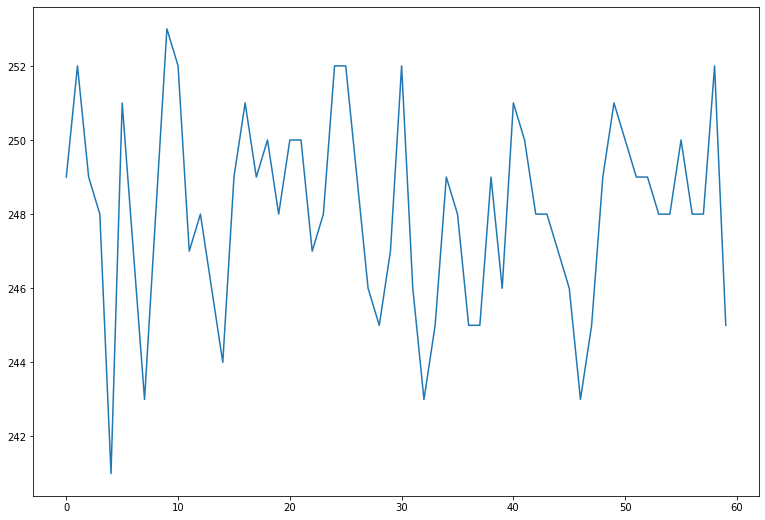

In [37]:
plt.rcParams['figure.figsize'] = [13, 9]
plt.plot (wvfs[51,203])

In [38]:
all_values[0][0]

465

In [36]:
for j in range (len(ADC_values)):
    if len(all_values[j])==1:
        print ('The event with Delta ADC =', ADC_values[j], 'happened only once, not periodic.')
    else:
        timediff=[]
        values=[]
        for i in all_values[j]:
            if (all_values[j].index(i))== len (all_values[j])-1:
                break
            else:
                timediff.append(timestamps [(all_values[j][all_values[j].index(i)+1])]-timestamps[i])
        values.append (timediff[0])
        for k in range (1,len (timediff)):
                if timediff[k] in values:
                    continue
                else:
                    values.append (timediff[k])
        for p in values:
            print ('Delta ADC =', ADC_values[j],'  ',p, ' ' ,timediff.count (p),'/', len(timediff))

The event with Delta ADC = 5.0 happened only once, not periodic.
Delta ADC = 6.0    0.24709868431091309   1 / 56
Delta ADC = 6.0    0.6122450828552246   1 / 56
Delta ADC = 6.0    0.16306495666503906   1 / 56
Delta ADC = 6.0    0.2080831527709961   1 / 56
Delta ADC = 6.0    0.33013200759887695   1 / 56
Delta ADC = 6.0    0.21208477020263672   1 / 56
Delta ADC = 6.0    0.020008325576782227   1 / 56
Delta ADC = 6.0    0.019007444381713867   2 / 56
Delta ADC = 6.0    0.046018362045288086   1 / 56
Delta ADC = 6.0    0.11704659461975098   1 / 56
Delta ADC = 6.0    0.2701082229614258   1 / 56
Delta ADC = 6.0    0.015006065368652344   2 / 56
Delta ADC = 6.0    0.06002402305603027   1 / 56
Delta ADC = 6.0    0.06602621078491211   1 / 56
Delta ADC = 6.0    0.06902766227722168   1 / 56
Delta ADC = 6.0    0.033013105392456055   1 / 56
Delta ADC = 6.0    0.039015769958496094   1 / 56
Delta ADC = 6.0    0.07603049278259277   2 / 56
Delta ADC = 6.0    0.27510976791381836   1 / 56
Delta ADC = 6.0    0

Delta ADC = 8.0    0.019007444381713867   6 / 1292
Delta ADC = 8.0    0.014005899429321289   8 / 1292
Delta ADC = 8.0    0.010004281997680664   5 / 1292
Delta ADC = 8.0    0.041016578674316406   1 / 1292
Delta ADC = 8.0    0.025010108947753906   3 / 1292
Delta ADC = 8.0    0.012005090713500977   3 / 1292
Delta ADC = 8.0    0.006001949310302734   1 / 1292
Delta ADC = 8.0    0.020008325576782227   2 / 1292
Delta ADC = 8.0    0.02100825309753418   4 / 1292
Delta ADC = 8.0    0.02901148796081543   3 / 1292
Delta ADC = 8.0    0.013005495071411133   4 / 1292
Delta ADC = 8.0    0.025010347366333008   2 / 1292
Delta ADC = 8.0    0.022008657455444336   3 / 1292
Delta ADC = 8.0    0.02400946617126465   4 / 1292
Delta ADC = 8.0    0.015005826950073242   7 / 1292
Delta ADC = 8.0    0.03501391410827637   1 / 1292
Delta ADC = 8.0    0.011004209518432617   12 / 1292
Delta ADC = 8.0    0.046018123626708984   1 / 1292
Delta ADC = 8.0    0.006002664566040039   3 / 1292
Delta ADC = 8.0    0.0270109176635

Delta ADC = 10.0    0.006002664566040039   1 / 1579
Delta ADC = 10.0    0.02901148796081543   1 / 1579
Delta ADC = 10.0    0.03601431846618652   1 / 1579
Delta ADC = 10.0    0.02400970458984375   1 / 1579
Delta ADC = 10.0    0.026010513305664062   3 / 1579
Delta ADC = 10.0    0.03401350975036621   1 / 1579
Delta ADC = 10.0    0.025010108947753906   1 / 1579
Delta ADC = 10.0    0.017006397247314453   1 / 1579
Delta ADC = 10.0    0.012004375457763672   1 / 1579
Delta ADC = 10.0    0.02601027488708496   1 / 1579
Delta ADC = 10.0    0.022008657455444336   1 / 1579
Delta ADC = 11.0    0.0010004043579101562   79 / 1052
Delta ADC = 11.0    0.02701091766357422   4 / 1052
Delta ADC = 11.0    0.0040013790130615234   19 / 1052
Delta ADC = 11.0    0.019007444381713867   10 / 1052
Delta ADC = 11.0    0.014005899429321289   5 / 1052
Delta ADC = 11.0    0.002000570297241211   22 / 1052
Delta ADC = 11.0    0.0030014514923095703   30 / 1052
Delta ADC = 11.0    0.0060024261474609375   69 / 1052
Delta AD

Delta ADC = 13.0    0.031012296676635742   4 / 347
Delta ADC = 13.0    0.028011322021484375   6 / 347
Delta ADC = 13.0    0.08803510665893555   1 / 347
Delta ADC = 13.0    0.015005826950073242   3 / 347
Delta ADC = 13.0    0.007002592086791992   1 / 347
Delta ADC = 13.0    0.009003877639770508   2 / 347
Delta ADC = 13.0    0.06302523612976074   5 / 347
Delta ADC = 13.0    0.005002021789550781   10 / 347
Delta ADC = 13.0    0.0010001659393310547   4 / 347
Delta ADC = 13.0    0.10104036331176758   1 / 347
Delta ADC = 13.0    0.02901148796081543   3 / 347
Delta ADC = 13.0    0.0010006427764892578   1 / 347
Delta ADC = 13.0    0.013005256652832031   4 / 347
Delta ADC = 13.0    0.003000974655151367   7 / 347
Delta ADC = 13.0    0.0010004043579101562   9 / 347
Delta ADC = 13.0    0.015006065368652344   6 / 347
Delta ADC = 13.0    0.04001593589782715   1 / 347
Delta ADC = 13.0    0.05001997947692871   2 / 347
Delta ADC = 13.0    0.04701876640319824   3 / 347
Delta ADC = 13.0    0.035013914108

Delta ADC = 15.0    0.12605023384094238   1 / 271
Delta ADC = 15.0    0.02100849151611328   2 / 271
Delta ADC = 15.0    0.07202887535095215   1 / 271
Delta ADC = 15.0    0.09803915023803711   2 / 271
Delta ADC = 15.0    0.04701876640319824   1 / 271
Delta ADC = 15.0    0.027010679244995117   1 / 271
Delta ADC = 15.0    0.0030012130737304688   3 / 271
Delta ADC = 15.0    0.0480191707611084   1 / 271
Delta ADC = 15.0    0.03501415252685547   2 / 271
Delta ADC = 15.0    0.018007278442382812   1 / 271
Delta ADC = 15.0    0.010004043579101562   2 / 271
Delta ADC = 15.0    0.012004852294921875   6 / 271
Delta ADC = 15.0    0.015006065368652344   3 / 271
Delta ADC = 15.0    0.03901553153991699   2 / 271
Delta ADC = 15.0    0.03401350975036621   3 / 271
Delta ADC = 15.0    0.1050419807434082   2 / 271
Delta ADC = 15.0    0.013005256652832031   3 / 271
Delta ADC = 15.0    0.009003400802612305   1 / 271
Delta ADC = 15.0    0.017006874084472656   3 / 271
Delta ADC = 15.0    0.0160064697265625   2

Delta ADC = 16.0    0.14705896377563477   1 / 249
Delta ADC = 17.0    0.12605047225952148   1 / 237
Delta ADC = 17.0    0.010004043579101562   3 / 237
Delta ADC = 17.0    0.0030012130737304688   4 / 237
Delta ADC = 17.0    0.0020008087158203125   2 / 237
Delta ADC = 17.0    0.019007444381713867   3 / 237
Delta ADC = 17.0    0.0030014514923095703   3 / 237
Delta ADC = 17.0    0.10804319381713867   1 / 237
Delta ADC = 17.0    0.06502580642700195   1 / 237
Delta ADC = 17.0    0.06602644920349121   1 / 237
Delta ADC = 17.0    0.0960383415222168   2 / 237
Delta ADC = 17.0    0.007003068923950195   1 / 237
Delta ADC = 17.0    0.011004447937011719   2 / 237
Delta ADC = 17.0    0.0060024261474609375   3 / 237
Delta ADC = 17.0    0.031012296676635742   2 / 237
Delta ADC = 17.0    0.0320127010345459   2 / 237
Delta ADC = 17.0    0.05002021789550781   1 / 237
Delta ADC = 17.0    0.03401327133178711   1 / 237
Delta ADC = 17.0    0.02100849151611328   2 / 237
Delta ADC = 17.0    0.02300906181335449

Delta ADC = 18.0    0.07202863693237305   1 / 207
Delta ADC = 18.0    0.10003995895385742   1 / 207
Delta ADC = 18.0    0.08603453636169434   2 / 207
Delta ADC = 18.0    0.023009061813354492   3 / 207
Delta ADC = 18.0    0.11804723739624023   1 / 207
Delta ADC = 18.0    0.010003805160522461   1 / 207
Delta ADC = 18.0    0.025010108947753906   2 / 207
Delta ADC = 18.0    0.017006635665893555   1 / 207
Delta ADC = 18.0    0.041016340255737305   1 / 207
Delta ADC = 18.0    0.06502580642700195   1 / 207
Delta ADC = 18.0    0.14205694198608398   1 / 207
Delta ADC = 18.0    0.019007444381713867   1 / 207
Delta ADC = 18.0    0.08203291893005371   1 / 207
Delta ADC = 18.0    0.09803915023803711   1 / 207
Delta ADC = 18.0    0.022008895874023438   1 / 207
Delta ADC = 18.0    0.09203696250915527   1 / 207
Delta ADC = 18.0    0.05202054977416992   1 / 207
Delta ADC = 18.0    0.020008325576782227   1 / 207
Delta ADC = 18.0    0.022008419036865234   1 / 207
Delta ADC = 18.0    0.16606640815734863  

Delta ADC = 21.0    0.05302119255065918   1 / 177
Delta ADC = 21.0    0.041016578674316406   1 / 177
Delta ADC = 21.0    0.038015127182006836   3 / 177
Delta ADC = 21.0    0.015005826950073242   1 / 177
Delta ADC = 21.0    0.07803106307983398   3 / 177
Delta ADC = 21.0    0.09703898429870605   1 / 177
Delta ADC = 21.0    0.2691075801849365   1 / 177
Delta ADC = 21.0    0.0020008087158203125   1 / 177
Delta ADC = 21.0    0.027010679244995117   1 / 177
Delta ADC = 21.0    0.04201674461364746   2 / 177
Delta ADC = 21.0    0.10804319381713867   1 / 177
Delta ADC = 21.0    0.002001047134399414   2 / 177
Delta ADC = 21.0    0.01300501823425293   2 / 177
Delta ADC = 21.0    0.11604642868041992   1 / 177
Delta ADC = 21.0    0.14305710792541504   1 / 177
Delta ADC = 21.0    0.0030012130737304688   1 / 177
Delta ADC = 21.0    0.031012535095214844   1 / 177
Delta ADC = 21.0    0.011004209518432617   1 / 177
Delta ADC = 21.0    0.005002260208129883   1 / 177
Delta ADC = 21.0    0.07402944564819336

Delta ADC = 23.0    0.13405370712280273   1 / 137
Delta ADC = 23.0    0.003000974655151367   1 / 137
Delta ADC = 23.0    0.028011322021484375   1 / 137
Delta ADC = 23.0    0.043016910552978516   1 / 137
Delta ADC = 23.0    0.10604238510131836   1 / 137
Delta ADC = 23.0    0.020008087158203125   1 / 137
Delta ADC = 23.0    0.0030012130737304688   1 / 137
Delta ADC = 23.0    0.09903979301452637   1 / 137
Delta ADC = 23.0    0.22008776664733887   1 / 137
Delta ADC = 23.0    0.0160062313079834   1 / 137
Delta ADC = 23.0    0.05602264404296875   1 / 137
Delta ADC = 23.0    0.041016340255737305   1 / 137
Delta ADC = 23.0    0.20408153533935547   1 / 137
Delta ADC = 23.0    0.2611045837402344   1 / 137
Delta ADC = 23.0    0.011004209518432617   1 / 137
Delta ADC = 23.0    0.047019004821777344   1 / 137
Delta ADC = 23.0    0.3741495609283447   1 / 137
Delta ADC = 23.0    0.02901148796081543   1 / 137
Delta ADC = 23.0    0.03401374816894531   1 / 137
Delta ADC = 23.0    0.06802701950073242   1 

Delta ADC = 26.0    0.06102442741394043   1 / 71
Delta ADC = 26.0    0.0960383415222168   1 / 71
Delta ADC = 26.0    0.46318531036376953   1 / 71
Delta ADC = 26.0    0.05902361869812012   1 / 71
Delta ADC = 26.0    0.051020145416259766   1 / 71
Delta ADC = 26.0    0.005002021789550781   2 / 71
Delta ADC = 26.0    0.09003615379333496   1 / 71
Delta ADC = 26.0    0.17006802558898926   1 / 71
Delta ADC = 26.0    0.3401358127593994   1 / 71
Delta ADC = 26.0    0.2991197109222412   1 / 71
Delta ADC = 26.0    0.062024593353271484   1 / 71
Delta ADC = 26.0    0.0030014514923095703   1 / 71
Delta ADC = 26.0    0.05002021789550781   1 / 71
Delta ADC = 26.0    0.008002996444702148   1 / 71
Delta ADC = 26.0    0.09503793716430664   1 / 71
Delta ADC = 26.0    0.07202911376953125   1 / 71
Delta ADC = 26.0    0.0160062313079834   1 / 71
Delta ADC = 26.0    0.12204885482788086   1 / 71
Delta ADC = 26.0    0.01900768280029297   1 / 71
Delta ADC = 26.0    0.29111623764038086   1 / 71
Delta ADC = 26.0  

In [40]:
print (all_values [11])

[55, 375, 383, 511, 632, 708, 1061, 1244, 1685, 1736, 1814, 1920, 2305, 2532, 2669, 2795, 3123, 3215, 3256, 3418, 3532, 3586, 3606, 3832, 4115, 4184, 4268, 4356, 4423, 4457, 4496, 4552, 4729, 4776, 4831, 5126, 5159, 5167, 5244, 5308, 5691, 5774, 6110, 6294, 6563, 6588, 6589, 6706, 6708, 6851, 7165, 7343, 7525, 7632, 7776, 7826, 7876, 7979, 8681, 9608, 9711, 9825, 9829, 9877]


In [41]:
for i in range (len(ADC_values)):
    print (i,len (finalarrangedpeaks[i]))

0 42
1 486
2 1605
3 2227
4 1878
5 1207
6 697
7 372
8 206
9 134
10 88
11 64
12 41
13 32
14 24
15 32
16 35
17 43
18 62
19 72
20 77
21 97
22 90
23 117
24 103
25 44
26 45
27 31
28 14
29 18
30 8
31 5
32 1
33 1
34 1
35 1


In [42]:
evtlist= []
for i in range (252):
    evtlist.append (finalarrangedpeaks[9][i][0])
print (evtlist)

IndexError: list index out of range

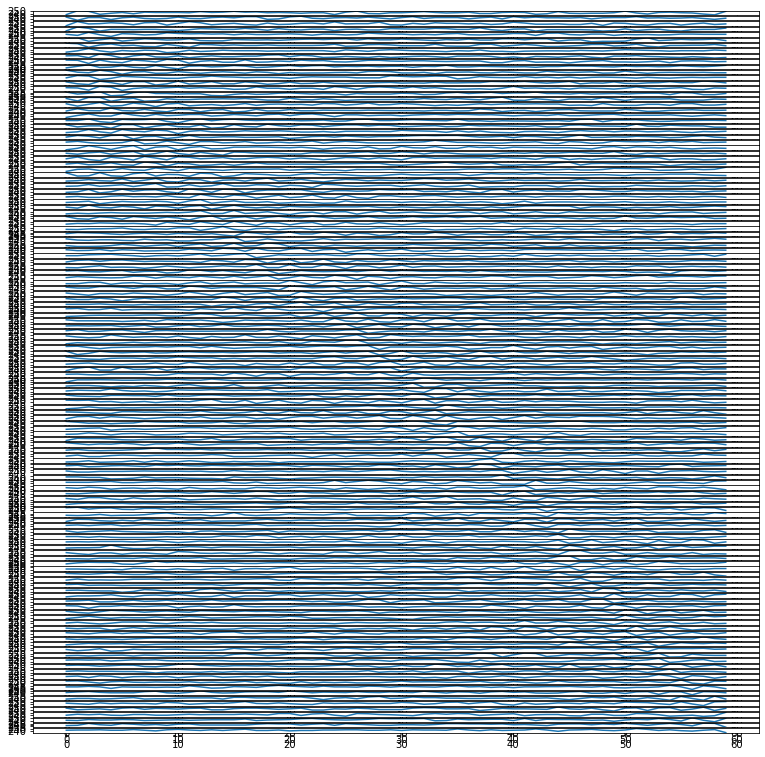

In [43]:
plt.rcParams['figure.figsize'] = [13, 25]
for i in evtlist:
    plt.subplot (252,1,evtlist.index(i)+1)
    plt.plot (wvfs[i,most_noisy])


In [44]:
print (finalarrangedpeaks[9])

[[2122, 0], [4549, 0], [6029, 0], [6977, 0], [836, 1], [4176, 1], [4415, 1], [6585, 1], [3406, 2], [3464, 2], [3935, 2], [4134, 2], [6797, 2], [7673, 2], [9771, 2], [1517, 3], [2204, 3], [4782, 3], [7918, 3], [1027, 4], [4339, 4], [8914, 4], [9369, 4], [8184, 5], [3275, 6], [6351, 6], [7087, 6], [9144, 6], [9287, 6], [6431, 7], [7487, 7], [1117, 8], [3661, 8], [3039, 10], [3507, 11], [149, 12], [1918, 12], [5901, 12], [4891, 13], [2206, 14], [6909, 14], [136, 15], [4503, 15], [6462, 15], [4554, 16], [6350, 16], [407, 17], [4784, 17], [3741, 18], [8920, 18], [993, 19], [3736, 19], [1075, 20], [3922, 20], [622, 21], [3156, 23], [3826, 23], [6353, 23], [5238, 25], [441, 26], [1350, 26], [3547, 26], [5989, 27], [7681, 27], [3169, 28], [3058, 29], [3276, 29], [3999, 30], [52, 31], [9997, 31], [727, 32], [3004, 32], [6403, 32], [481, 33], [3332, 33], [5439, 33], [1011, 34], [6244, 34], [729, 35], [6433, 36], [731, 37], [3702, 37], [4476, 38], [8190, 38], [9927, 38], [2588, 39], [6681, 39], [

Text(0.5, 1.0, 'Evolution of the position of the Max')

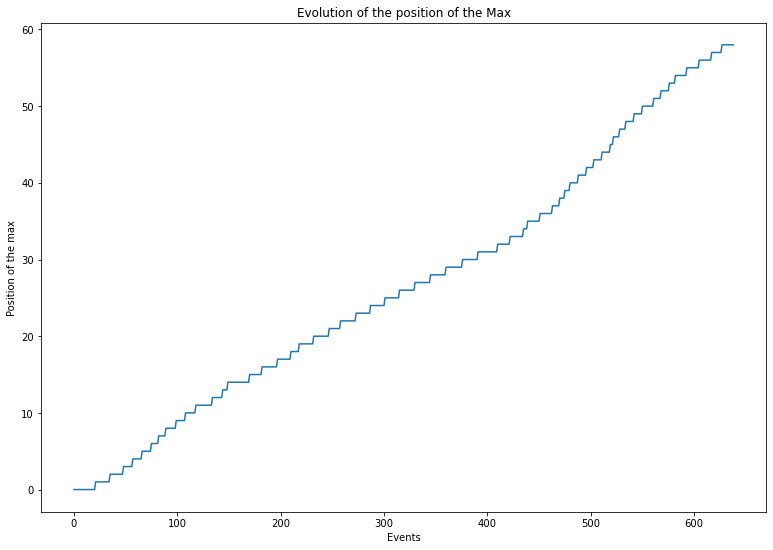

In [38]:
plt.rcParams['figure.figsize'] = [13,9]

x=list (range(len(finalarrangedpeaks[7])))
y=[]
for i in range (len (finalarrangedpeaks[7])):
    y.append (finalarrangedpeaks[7][i][1])
plt.plot (x,y)
plt.ylabel('Position of the max')
plt.xlabel('Events')
plt.title ('Evolution of the position of the Max')

In [39]:
print (negevents[most_noisy])

[51, 85, 89, 139, 183, 194, 203, 238, 267, 280, 281, 309, 347, 382, 390, 413, 429, 445, 467, 480, 513, 618, 620, 624, 638, 655, 768, 773, 782, 791, 802, 824, 840, 848, 859, 909, 952, 955, 987, 995, 1023, 1080, 1093, 1108, 1141, 1194, 1195, 1196, 1252, 1277, 1287, 1303, 1372, 1401, 1461, 1468, 1469, 1484, 1487, 1511, 1516, 1541, 1573, 1583, 1585, 1600, 1625, 1630, 1642, 1652, 1669, 1730, 1743, 1746, 1748, 1751, 1775, 1776, 1783, 1810, 1856, 1875, 1879, 1880, 1889, 1895, 1908, 1919, 1922, 1941, 1991, 2031, 2036, 2045, 2055, 2059, 2140, 2164, 2185, 2199, 2205, 2230, 2329, 2330, 2359, 2379, 2390, 2455, 2459, 2481, 2485, 2499, 2511, 2517, 2559, 2571, 2585, 2627, 2690, 2716, 2723, 2737, 2738, 2741, 2762, 2763, 2768, 2769, 2775, 2853, 2854, 2864, 2869, 2888, 2917, 2927, 2957, 3025, 3030, 3074, 3101, 3110, 3111, 3139, 3171, 3175, 3181, 3211, 3301, 3349, 3350, 3351, 3363, 3376, 3389, 3412, 3429, 3473, 3513, 3528, 3535, 3631, 3687, 3696, 3707, 3715, 3726, 3731, 3734, 3777, 3783, 3818, 3834, 3835

In [40]:
print (timestamps[50])

1560727855.1383827


In [41]:
x=list (range(len(negevents[most_noisy])))
newstamps=[]
newstamps.append(0)
yy=[]
yy.append(0)
for i in range (len(negevents[most_noisy])):
    if i== (len (negevents[most_noisy])-1):
        continue
    else:
        newtime= timestamps[negevents[most_noisy][i+1]]- timestamps[negevents[most_noisy][i]]
        yy.append (newtime)

In [42]:
y=[]
for i in (negevents[most_noisy]):
    y.append (timestamps[i])
print (len(y))

441


Text(0.5, 1.0, 'Time evolution of successive events')

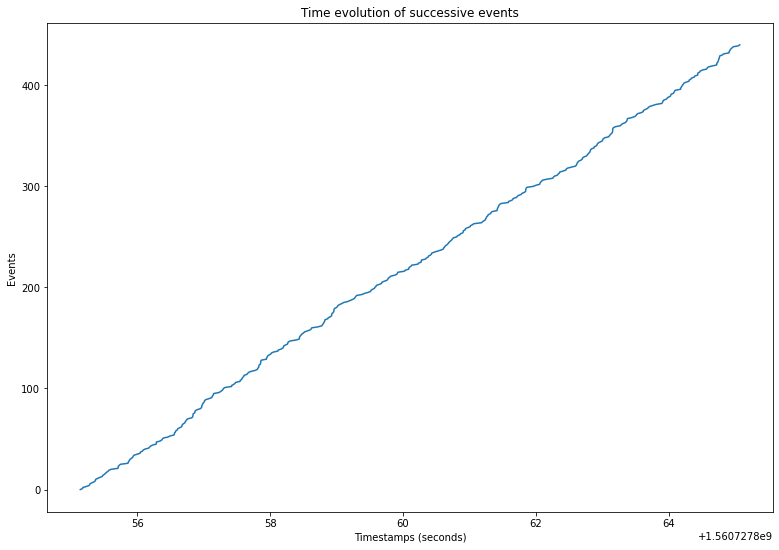

In [43]:
plt.plot (y,x)
plt.xlabel ('Timestamps (seconds)')
plt.ylabel ('Events')
plt.title ('Time evolution of successive events')

Text(0, 0.5, 'Count')

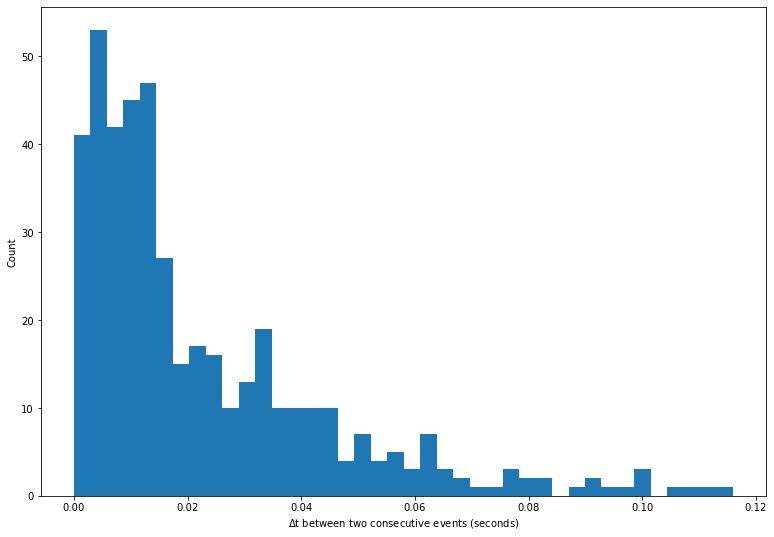

In [44]:
plt.hist(yy,bins=40)
plt.xlabel ('$\Delta$t between two consecutive events (seconds)')
plt.ylabel ('Count')

Text(0.5, 1.0, 'Time evolution of all noisy events')

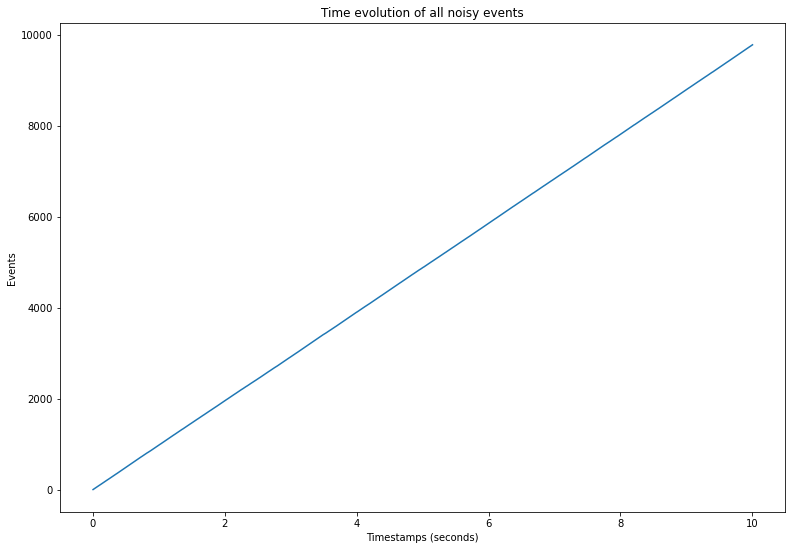

In [45]:
x=list (range(len(totalnegevents)))
y=[]
for i in totalnegevents:
    y.append (timestamps[i]-timestamps[0])
    
plt.plot(y,x)
plt.xlabel ('Timestamps (seconds)')
plt.ylabel ('Events')
plt.title ('Time evolution of all noisy events')

In [37]:
yyy=[]
yyy.append(0)
for i in range (len(totalnegevents)):
    if i== (len (totalnegevents)-1):
        continue
    else:
        newtime= timestamps[totalnegevents[i+1]]- timestamps[totalnegevents[i]]
        yyy.append (newtime)

Text(0.5, 1.0, 'Distribution of periods')

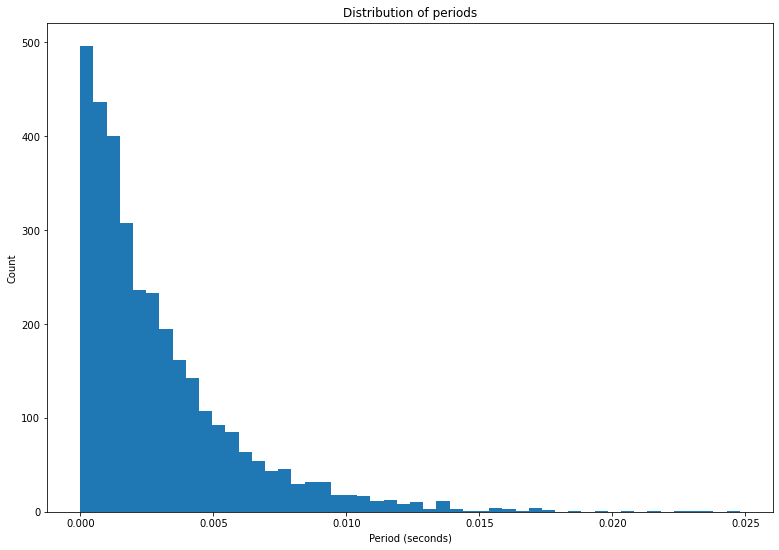

In [38]:
plt.hist(yyy,bins=50)
plt.xlabel ('Period (seconds)')
plt.ylabel ('Count')
plt.title ('Distribution of periods')
#plt.yscale('log')

In [39]:
print (len(totalnegevents))

3329


In [40]:
print (totalnegevents)

[0, 3, 4, 7, 8, 9, 11, 13, 16, 18, 22, 25, 27, 30, 32, 35, 37, 41, 42, 44, 46, 49, 51, 56, 62, 67, 69, 72, 75, 76, 78, 79, 86, 92, 94, 96, 98, 99, 106, 107, 109, 111, 114, 119, 122, 123, 125, 135, 137, 140, 142, 151, 153, 156, 160, 163, 169, 170, 172, 174, 176, 177, 180, 187, 193, 194, 195, 196, 198, 199, 205, 210, 213, 218, 219, 222, 223, 225, 228, 235, 247, 249, 254, 255, 259, 260, 265, 269, 273, 275, 278, 280, 282, 284, 287, 290, 294, 296, 297, 306, 308, 309, 310, 312, 316, 319, 324, 328, 330, 333, 334, 337, 340, 343, 345, 350, 357, 366, 370, 374, 378, 384, 385, 391, 395, 398, 400, 402, 408, 409, 414, 415, 418, 420, 425, 427, 429, 431, 432, 439, 442, 443, 448, 451, 453, 454, 455, 456, 457, 461, 462, 463, 470, 471, 473, 476, 477, 478, 482, 484, 487, 491, 493, 496, 497, 500, 503, 504, 507, 509, 515, 516, 519, 525, 528, 530, 532, 533, 534, 541, 548, 549, 552, 558, 560, 563, 565, 566, 567, 570, 573, 574, 577, 588, 591, 592, 593, 597, 600, 601, 602, 609, 611, 613, 616, 621, 627, 633, 639

In [41]:
timestamps [3]-timestamps[2]

0.0008301734924316406

In [42]:
count=0
deltaT=[]
for i in range (1,len(totalnegevents)):
    chi=timestamps[totalnegevents[i]]- timestamps[totalnegevents[i]-1]
    deltaT.append (chi)
    if 0.001<chi<0.002:
        count+=1
#print (deltaT)

Text(0.5, 1.0, '$\\Delta$t between a noisy event and the event before it')

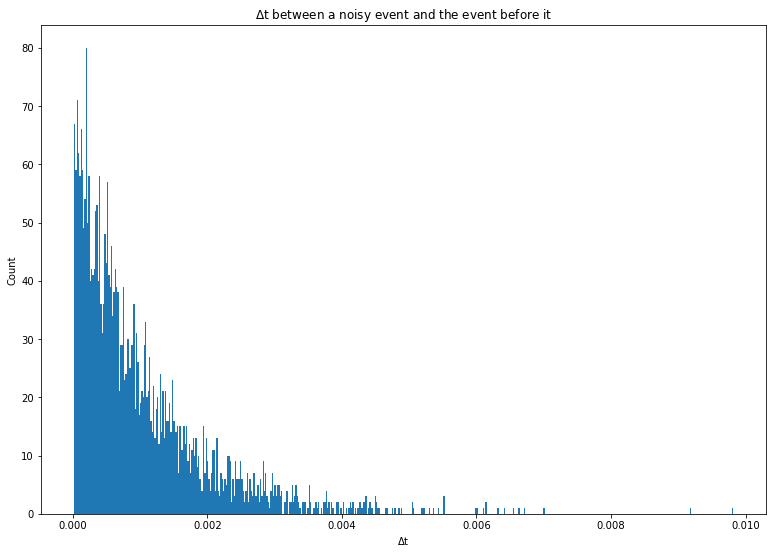

In [56]:
plt.hist(deltaT,bins=500 )
#range = (0.0005,0.0015))
plt.xlabel ('$\Delta$t')
plt.ylabel ('Count')
plt.title ('$\Delta$t between a noisy event and the event before it')

In [45]:
print (count)

772


In [62]:
dt=[]
DT=[]
for i in range (1,10000):
    taouk= timestamps[i]-timestamps[i-1]
    DT.append (taouk)
    if 0.001<taouk<0.0011:
        dt.append ([taouk])

(array([229., 220., 206., 183., 193., 212., 173., 152., 183., 184., 204.,
        156., 153., 130., 149., 171., 144., 150., 144., 151., 131., 122.,
        118., 134., 129., 140., 116., 116., 110., 122., 132., 113.,  96.,
        114., 100., 105.,  82.,  83.,  97.,  94.,  97.,  86.,  81.,  94.,
         72.,  78.,  78.,  75.,  73.,  74.,  64.,  76.,  65.,  70.,  66.,
         54.,  65.,  54.,  59.,  73.,  52.,  50.,  50.,  59.,  66.,  48.,
         58.,  52.,  53.,  43.,  46.,  49.,  41.,  39.,  47.,  44.,  46.,
         51.,  33.,  48.,  32.,  41.,  38.,  37.,  32.,  34.,  28.,  35.,
         30.,  26.,  34.,  23.,  23.,  22.,  27.,  27.,  33.,  22.,  30.,
         20.,  25.,  27.,  26.,  26.,  24.,  18.,  24.,  21.,  20.,  17.,
         18.,  22.,  28.,  24.,  11.,  15.,  15.,  23.,  13.,  19.,  15.,
         14.,  28.,  14.,   9.,  14.,  11.,  21.,   7.,  17.,  18.,  13.,
         13.,  10.,  11.,  12.,   4.,  11.,  17.,  15.,  11.,  10.,  13.,
         12.,  12.,  14.,   8.,  12., 

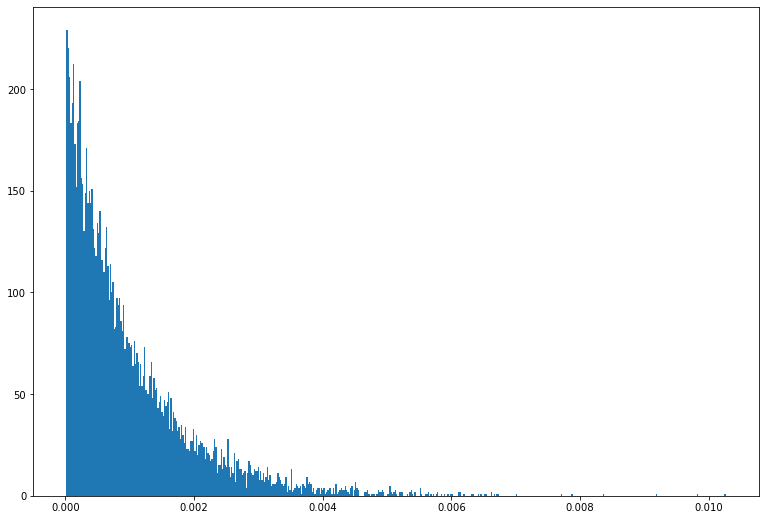

In [65]:
plt.hist(DT,bins=500)

In [48]:
print (len(dt))

341


In [66]:
pixels=[]
for i in range (3329):
    lista=[]
    for j in range (len(negevents)):
        if i in negevents[j]:
            lista.append(allpixelslist[j])
    pixels.append(lista)

In [67]:
print (pixels)

[[1043], [], [], [774], [542], [], [], [1070], [1043], [1043], [], [770], [], [1043], [], [], [1043], [], [1043], [], [], [], [1032], [], [], [803], [], [549], [], [], [821], [], [1079], [], [], [1043], [], [821], [], [], [], [1178], [1021], [], [896], [], [1043], [], [], [1070], [], [839, 917, 1054], [], [], [], [], [660, 661], [], [], [], [], [], [1043, 1054], [], [], [], [], [547], [], [1043], [], [], [820], [], [], [833], [1142], [], [1054], [821], [], [], [], [], [], [], [820, 821], [], [], [], [], [], [1054], [], [1043], [], [593, 941, 1054], [], [717], [1172], [], [], [], [], [], [], [714, 917], [821, 835], [], [896], [], [821], [], [], [917], [], [], [], [], [821, 1043], [], [], [890], [1043], [], [562, 917, 1054], [], [], [], [], [], [], [], [], [], [810], [], [1190], [], [], [821, 1055], [], [820], [], [], [], [], [], [], [], [], [551], [], [821, 917], [], [], [1043], [], [], [], [1043], [], [], [1043], [], [], [], [], [], [803], [773], [], [820, 821], [], [1079], [], [1154],

In [70]:
proportions=[]
for i in range (1855):
    if i in pixels[0]:
        props= (len(negevents[allpixelslist.index(i)]))
    else:
        props=0
    proportions.append (props)
    
most_noisyID=proportions.index(np.max(proportions))
arrangedprops= sorted (proportions, reverse=True)
proportionsunchanged=proportions

proportions= [proportions]
proportions= np.array (proportions)
proportions.shape

(1, 1855)

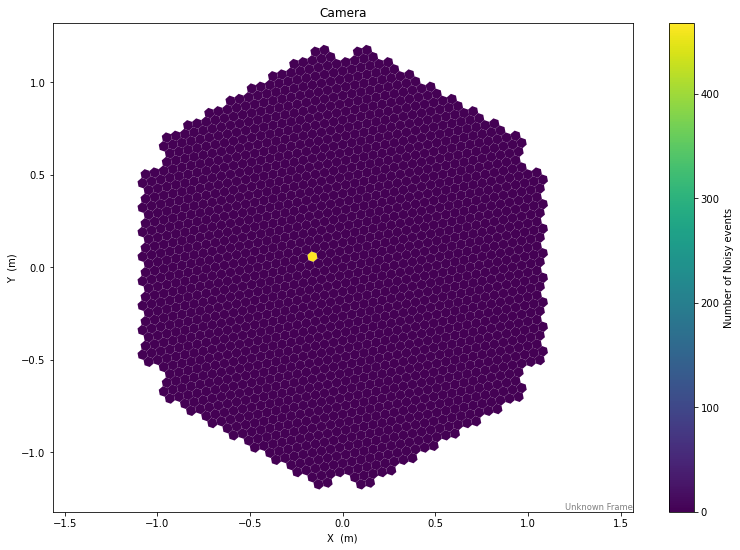

In [71]:
plt.rcParams['figure.figsize'] = [13,9]
geom = CameraGeometry.from_name("NectarCam-003")
geom.rotate(90*u.deg)

disp = CameraDisplay(geom,title="Camera")
disp.image= proportions.mean(axis=0)

#disp.image = wvfs[0,0,:].mean(axis=1)
disp.add_colorbar(label='Number of Noisy events')
#disp.set_limits_minmax(240,255)

In [149]:
print (timestamps[-1] - timestamps[0])

10.002999544143677
